# Terminology


## Overview: Statistical Concepts Cheat Sheet (Ordered from Basic → Advanced)

| **Category** | **Terminology** | **Definition / Description** | **Usage Example** | **Formula** |
|---------------|----------------|------------------------------|-------------------|--------------|
| **Central Tendency** | **Mean (Average)** | Sum of all values divided by the number of values. | Average revenue per user. | $\mu = \frac{1}{n}\sum_{i=1}^{n} x_i$ |
| **Central Tendency** | **Median** | Middle value when data is sorted (or average of two middle values). | Typical household income (robust to outliers). | – |
| **Central Tendency** | **Mode** | Most frequently occurring value in a dataset. | Most common product size ordered. | – |
| **Dispersion / Spread** | **Range / Spread** | Difference between maximum and minimum values. | Revenue variability in a week. | $\text{Range} = \max(x) - \min(x)$ |
| **Dispersion / Spread** | **Deviation** | Difference of each observation from the mean. | How far each student’s score is from the class average. | $d_i = x_i - \mu$ |
| **Dispersion / Spread** | **Variance** | Average squared deviation from the mean (measures spread). | Comparing volatility of two investments. | $\sigma^2 = \frac{1}{n}\sum_{i=1}^{n}(x_i - \mu)^2$ |
| **Dispersion / Spread** | **Standard Deviation (SD)** | Square root of variance; spread in same units as data; measures how much individual data points typically deviate from the mean (spread of the data). | Customer spending variability. | $\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(x_i - \mu)^2}$ |
| **Distribution** | **Normal Distribution** | Bell-shaped, symmetric distribution defined by mean and variance. | Modeling test scores, noise, heights. | $f(x) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{ -\frac{(x-\mu)^2}{2\sigma^2} }$ |
| **Distribution** | **Percentile** | Value below which a given % of observations fall. | 90th percentile income = “top 10% earners”. | – |
| **Distribution** | **Quartiles** | Special percentiles that split data into 4 equal parts (Q1=25%, Q2=50%, Q3=75%). | Comparing median vs. spread of salaries. | – |
| **Distribution** | **Interquartile Range (IQR)** | Middle 50% of data = Q3 − Q1. | Robust spread measure for skewed data. | $\text{IQR} = Q_3 - Q_1$ |
| **Standardization** | **z-score / z-value** | Standardized value: how many SDs away from mean. | Compare student’s score across different tests. | $z = \frac{x - \mu}{\sigma}$ |
| **Estimation / Sampling** | **Standard Error (SE)** | The standard error measures **how precisely the sample mean estimates the population mean**. You take many samples and compute the mean every time. The standard deviation of those sample means tells you how much your sample mean typically varies from one random sample to another. That spread is the standard error. | Precision of estimated average revenue per user. | $SE = \frac{\sigma}{\sqrt{n}}$ |
| **Estimation / Sampling** | **Confidence Interval (CI)** | Range around an estimate likely to contain the true population parameter. | “95% CI for mean income is [45k, 55k].” | $\bar{x} \pm z_{\alpha/2} \cdot \frac{s}{\sqrt{n}}$ |
| **Relationships** | **Covariance** | Measure of how two variables vary together. | Height vs. weight relationship. | $\text{Cov}(X,Y) = \frac{1}{n}\sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y})$ |
| **Relationships** | **Correlation (Pearson’s r)** | Standardized covariance (−1 to +1). | Relationship between ad spend and revenue. | **Population formula:**<br>$r = \frac{\text{Cov}(X,Y)}{\sigma_X \sigma_Y}$<br><br>**Sample formula:**<br>$r = \frac{ \sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y}) }{ (n - 1) \, s_X \, s_Y }$<br><br>**where:**<br>• $x_i, y_i$ = individual data points<br>• $\bar{x}, \bar{y}$ = sample means<br>• $s_X, s_Y$ = sample standard deviations<br>• $n$ = number of observations |
| **Hypothesis Testing** | **p-value** | Probability of observing data at least as extreme under the null hypothesis. | A/B test: p < 0.05 means reject H₀ (significant result). | $p = P(T \geq t_{\text{obs}} \mid H_0)$ |
| **Hypothesis Testing** | **t-statistic** | Ratio of observed difference to its standard error. | Test mean difference between groups. | $t = \frac{\bar{x} - \mu_0}{s/\sqrt{n}}$ |
| **Hypothesis Testing** | **Degrees of Freedom (df)** | Number of independent values used in a calculation. | Used in t-tests and chi-square tests. | $df = n - 1$ (for one-sample mean test) |
| **Hypothesis Testing** | **Chi-Square (χ²)** | Tests independence between categorical variables or goodness-of-fit. | Test if campaign response depends on gender. | $\chi^2 = \sum \frac{(O - E)^2}{E}$ |

### Notation Summary Population vs. Sample
| **Concept**            | **Population** | **Sample** |
|-------------------------|----------------|-------------|
| **Mean**                | $\mu$          | $\bar{x}$   |
| **Standard Deviation**  | $\sigma$       | $s$         |
| **Variance**            | $\sigma^2$     | $s^2$       |
| **Size**                | $N$            | $n$         |

### When to Use Which Metric (Quick Reference)

| **Goal** | **Use These Metrics** | **Why** |
|-----------|-----------------------|----------|
| Measure typical value | Mean, Median, Mode | Central tendency — gives you the “center” of the data. |
| Measure spread or variability | Range, SD, Variance, IQR | Understand consistency or volatility in your data. |
| Compare two datasets | z-score, SE, CI | Standardized comparisons and sampling accuracy. |
| Explore relationships between variables | Covariance, Correlation | Quantify direction and strength of relationships. |
| Test a hypothesis (is there an effect?) | p-value, t-test, χ²-test | Formal statistical testing for significance. |
| Handle skewed data | Median, IQR | More robust to outliers than mean and SD. |
| Evaluate normality | z-score, SD, Histogram | Check if data follows a normal distribution for valid parametric tests. |

**Pro tip for business analysts:**  
- Use **mean and SD** for normally distributed KPIs (e.g., daily revenue).  
- Use **median and IQR** for skewed data (e.g., customer spend).  
- Use **correlation** to link actions to outcomes (e.g., ad spend → conversions).  
- Use **p-values and confidence intervals** to assess if changes are meaningful (e.g., A/B tests).  

## Mini-Visuals: Mean, Median, Mode, Variance, IQR, Percentiles, z-score

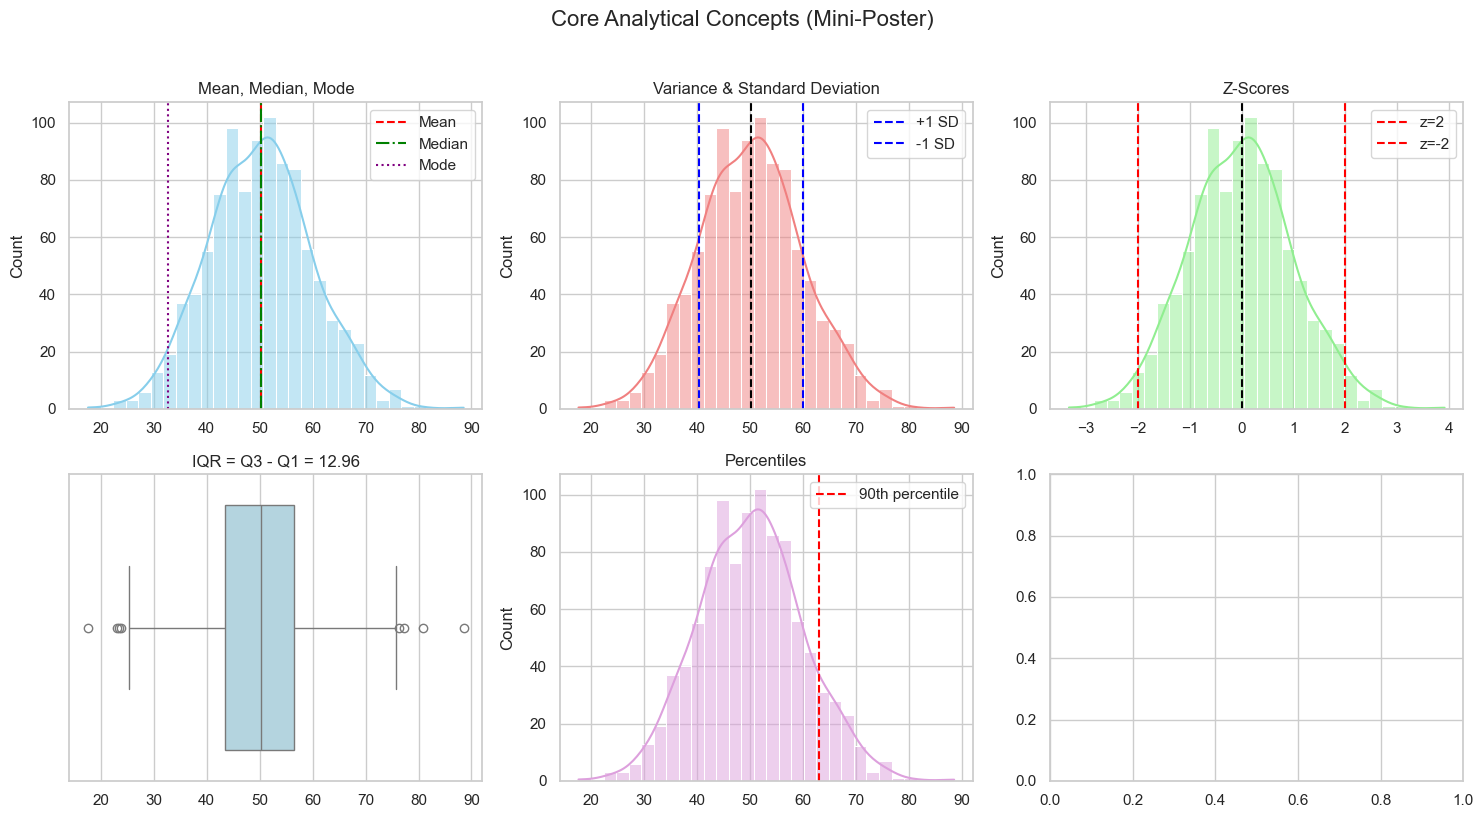

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import norm

# Generate data
np.random.seed(42)
data = np.random.normal(loc=50, scale=10, size=1000)

# Prepare figure with 2 rows × 3 columns
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

# --- 1. Mean, Median, Mode ---
sns.histplot(data, bins=30, kde=True, ax=axes[0], color="skyblue")
axes[0].axvline(np.mean(data), color="red", linestyle="--", label="Mean")
axes[0].axvline(np.median(data), color="green", linestyle="-.", label="Median")
# Approx mode = peak of histogram
mode_val = data[np.argmax(np.histogram(data, bins=30)[0])]
axes[0].axvline(mode_val, color="purple", linestyle=":", label="Mode")
axes[0].set_title("Mean, Median, Mode")
axes[0].legend()

# --- 2. Variance & Standard Deviation ---
sns.histplot(data, bins=30, kde=True, ax=axes[1], color="lightcoral")
mean = np.mean(data)
std = np.std(data)
axes[1].axvline(mean, color="black", linestyle="--")
axes[1].axvline(mean + std, color="blue", linestyle="--", label="+1 SD")
axes[1].axvline(mean - std, color="blue", linestyle="--", label="-1 SD")
axes[1].set_title("Variance & Standard Deviation")
axes[1].legend()

# --- 3. Z-Scores ---
z_scores = (data - mean) / std
sns.histplot(z_scores, bins=30, kde=True, ax=axes[2], color="lightgreen")
axes[2].axvline(0, color="black", linestyle="--")
axes[2].axvline(2, color="red", linestyle="--", label="z=2")
axes[2].axvline(-2, color="red", linestyle="--", label="z=-2")
axes[2].set_title("Z-Scores")
axes[2].legend()

# --- 4. Interquartile Range (IQR) ---
sns.boxplot(x=data, ax=axes[3], color="lightblue")
q1, q3 = np.percentile(data, [25, 75])
axes[3].set_title(f"IQR = Q3 - Q1 = {q3 - q1:.2f}")

# --- 5. Percentiles ---
sns.histplot(data, bins=30, kde=True, ax=axes[4], color="plum")
p90 = np.percentile(data, 90)
axes[4].axvline(p90, color="red", linestyle="--", label="90th percentile")
axes[4].set_title("Percentiles")
axes[4].legend()

plt.suptitle("Core Analytical Concepts (Mini-Poster)", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

## Mini-Visuals: Standard Deviation vs. Standard Error

> The **standard deviation** shows how spread out individual values are around the average.
> 
> The **standard error** shows how much the sample mean would vary if you took many samples. The standard error measures the typical distance between a sample mean and the true population mean.

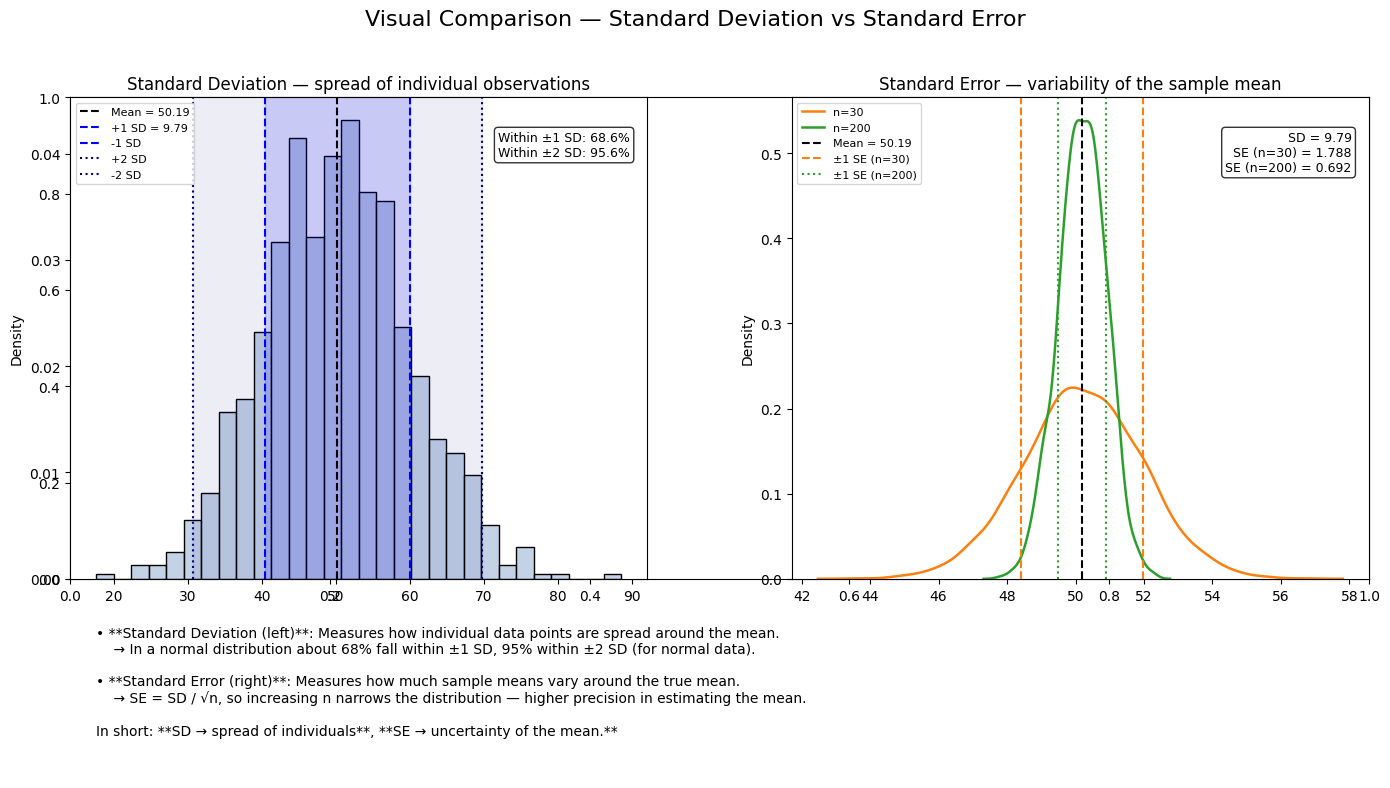

In [10]:
# =====================================================
# 2-panel figure for Standard Deviation vs Standard Error
# =====================================================

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Ensure same data & mean/std as original
mean = np.mean(data)
std_pop = np.std(data, ddof=0)
s_samp = np.std(data, ddof=1)

# Create wide layout: 2 panels side-by-side + 1 narrow row for text
fig, axes = plt.subplots(
    2, 1, figsize=(14, 8),
    gridspec_kw={"height_ratios": [3, 1]}
)

# Inner grid for the two top panels (SD and SE side-by-side)
gs = axes[0].get_subplotspec().subgridspec(1, 2, wspace=0.25)
ax_sd = fig.add_subplot(gs[0])
ax_se = fig.add_subplot(gs[1])

# -----------------------------------------------------
# Panel 1: Standard Deviation
# -----------------------------------------------------
sns.histplot(data, bins=30, kde=False, stat="density", ax=ax_sd, color="lightsteelblue")
ax_sd.axvline(mean, color="black", linestyle="--", label=f"Mean = {mean:.2f}")
ax_sd.axvline(mean + std_pop, color="blue", linestyle="--", label=f"+1 SD = {std_pop:.2f}")
ax_sd.axvline(mean - std_pop, color="blue", linestyle="--", label=f"-1 SD")
ax_sd.axvline(mean + 2 * std_pop, color="navy", linestyle=":", label=f"+2 SD")
ax_sd.axvline(mean - 2 * std_pop, color="navy", linestyle=":", label=f"-2 SD")

# Shaded ±1σ and ±2σ bands
ax_sd.axvspan(mean - std_pop, mean + std_pop, alpha=0.15, color="blue")
ax_sd.axvspan(mean - 2 * std_pop, mean + 2 * std_pop, alpha=0.07, color="navy")

# Percentages within ±1σ and ±2σ
within_1 = np.mean(np.abs(data - mean) <= std_pop) * 100
within_2 = np.mean(np.abs(data - mean) <= 2 * std_pop) * 100
ax_sd.text(0.97, 0.93, f"Within ±1 SD: {within_1:.1f}%\nWithin ±2 SD: {within_2:.1f}%",
           transform=ax_sd.transAxes, ha="right", va="top",
           bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.8), fontsize=9)

ax_sd.set_title("Standard Deviation — spread of individual observations")
ax_sd.legend(loc="upper left", fontsize=8)

# -----------------------------------------------------
# Panel 2: Standard Error
# -----------------------------------------------------
rng = np.random.default_rng(2025)
reps = 2000
n_small, n_large = 30, 200

means_small = np.array([rng.choice(data, size=n_small, replace=True).mean() for _ in range(reps)])
means_large = np.array([rng.choice(data, size=n_large, replace=True).mean() for _ in range(reps)])

sns.kdeplot(means_small, ax=ax_se, label=f"n={n_small}", linewidth=1.8, color="tab:orange")
sns.kdeplot(means_large, ax=ax_se, label=f"n={n_large}", linewidth=1.8, color="tab:green")

# SE for both sample sizes
se_small = s_samp / np.sqrt(n_small)
se_large = s_samp / np.sqrt(n_large)

# Lines at mean ± SE
ax_se.axvline(mean, color="black", linestyle="--", label=f"Mean = {mean:.2f}")
ax_se.axvline(mean + se_small, color="tab:orange", linestyle="--", label=f"±1 SE (n={n_small})")
ax_se.axvline(mean - se_small, color="tab:orange", linestyle="--")
ax_se.axvline(mean + se_large, color="tab:green", linestyle=":", label=f"±1 SE (n={n_large})")
ax_se.axvline(mean - se_large, color="tab:green", linestyle=":")

# Annotate numeric SE values
ax_se.text(0.97, 0.93,
           f"SD = {s_samp:.2f}\nSE (n={n_small}) = {se_small:.3f}\nSE (n={n_large}) = {se_large:.3f}",
           transform=ax_se.transAxes, ha="right", va="top",
           bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.8), fontsize=9)

ax_se.set_title("Standard Error — variability of the sample mean")
ax_se.legend(loc="upper left", fontsize=8)

# -----------------------------------------------------
# Explanatory text (bottom panel)
# -----------------------------------------------------
axes[1].axis("off")
note = (
    "• **Standard Deviation (left)**: Measures how individual data points are spread around the mean.\n"
    "    → In a normal distribution about 68% fall within ±1 SD, 95% within ±2 SD (for normal data).\n\n"
    "• **Standard Error (right)**: Measures how much sample means vary around the true mean.\n"
    "    → SE = SD / √n, so increasing n narrows the distribution — higher precision in estimating the mean.\n\n"
    "In short: **SD → spread of individuals**, **SE → uncertainty of the mean.**"
)
axes[1].text(0.02, 0.95, note, ha="left", va="top", fontsize=10, wrap=True)

# Final layout
fig.suptitle("Visual Comparison — Standard Deviation vs Standard Error", fontsize=16, y=0.98)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## Standard Normal Distribution
> It's called "standard" because it's the baseline or reference version that all other normal distributions can be compared to. Any normal distribution can be converted to the standard normal through a process called standardization or z-scoring.

The standard normal distribution is a specific version of the normal (bell curve) distribution with these exact properties:
* **Mean (μ) = 0** (centered at zero)
* **Standard deviation (σ) = 1** (unit variance)

Regular Normal Distribution:
* Mean: could be anything (e.g., 100, 50, -5)
* Std dev: could be anything (e.g., 15, 2, 0.5)
* Example: IQ scores (mean=100, std=15)

Standard Normal Distribution:
* Mean: always 0
* Std dev: always 1
* The "universal" normal curve

Converting to Standard Normal
* You can convert any value from a normal distribution to the standard normal using the
  
  **z-score formula**: $z = (x - μ) / σ$
  Where:
  * x = your data point
  * μ = mean of your data
  * σ = standard deviation of your data
  * z = the standardized value




Original scores: [65 70 75 80 85 90]
Z-scores: [-1.  -0.5  0.   0.5  1.   1.5]


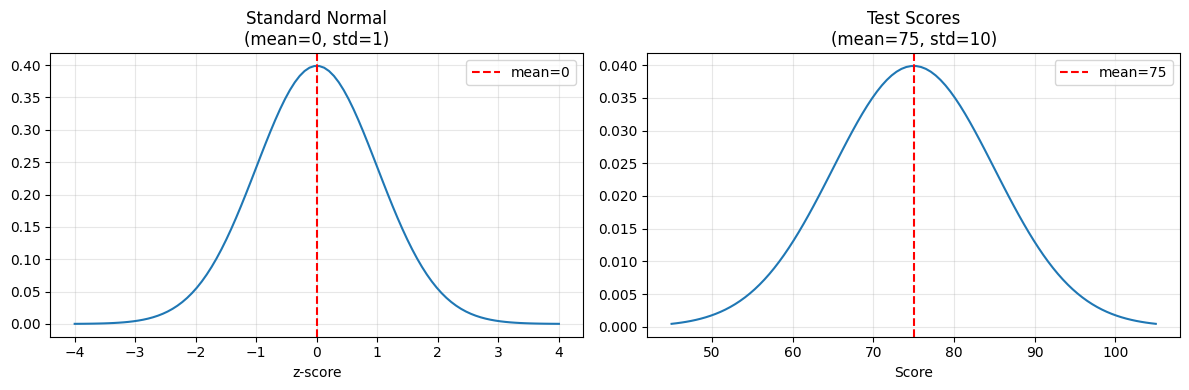

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Example: Test scores with mean=75, std=10
test_scores = np.array([65, 70, 75, 80, 85, 90])
mean = 75
std = 10

# Convert to standard normal (z-scores)
z_scores = (test_scores - mean) / std
print("Original scores:", test_scores)
print("Z-scores:", z_scores)
# Output: [-1.0, -0.5, 0.0, 0.5, 1.0, 1.5]

# Visualize both distributions
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Standard normal
x_standard = np.linspace(-4, 4, 100)
axes[0].plot(x_standard, stats.norm.pdf(x_standard, 0, 1))
axes[0].set_title("Standard Normal\n(mean=0, std=1)")
axes[0].set_xlabel("z-score")
axes[0].axvline(0, color='red', linestyle='--', label='mean=0')

# Regular normal
x_regular = np.linspace(45, 105, 100)
axes[1].plot(x_regular, stats.norm.pdf(x_regular, 75, 10))
axes[1].set_title("Test Scores\n(mean=75, std=10)")
axes[1].set_xlabel("Score")
axes[1].axvline(75, color='red', linestyle='--', label='mean=75')

for ax in axes:
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Confidence Intervals

> A confidence interval (CI) gives a range of values that likely contains the true value (like the mean).

For example, a 95% CI means that if you took many samples and computed the CI each time, about 95% of those intervals would contain the true value.
(It doesn’t mean there’s a 95% probability that this particular interval contains the true value — the true value is fixed, but the interval varies from sample to sample → it s a range not a probability.)

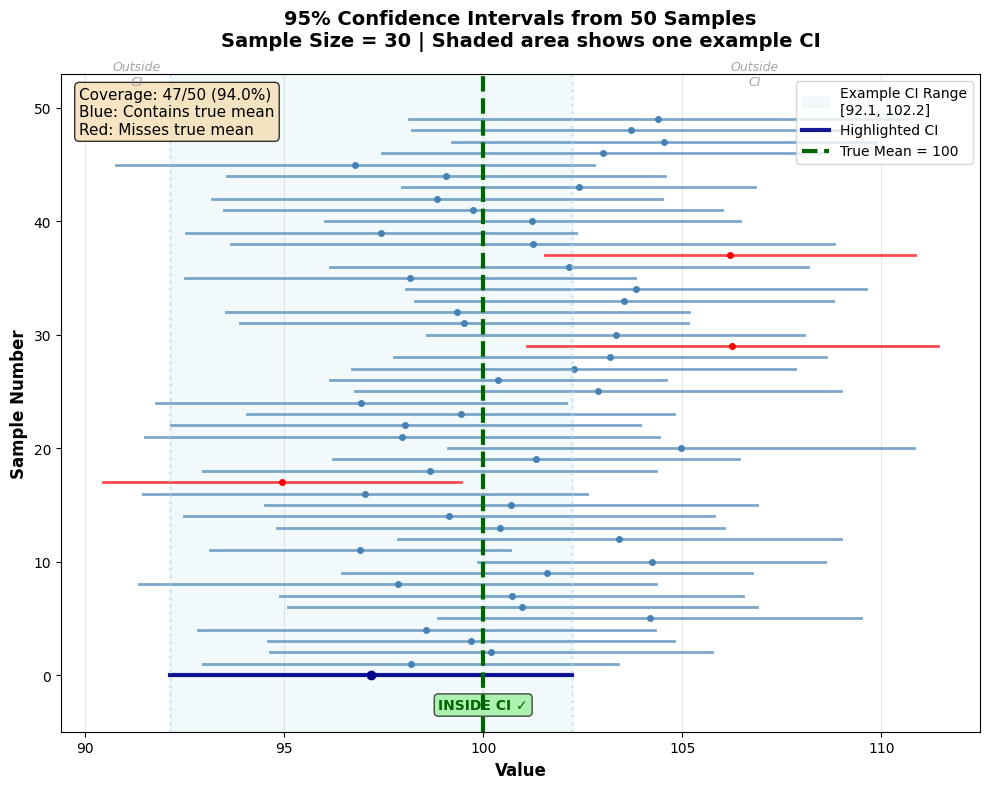


CONFIDENCE INTERVAL SIMULATION SUMMARY
True Population Mean: 100
Confidence Level: 95%
Number of Samples: 50
Sample Size (each): 30

Example CI (highlighted): [92.14, 102.22]
True mean (100) is INSIDE this CI

Overall Results:
CIs containing true mean: 47/50 (94.0%)
CIs missing true mean: 3/50

Expected coverage: ~95%
Actual coverage: 94.0%


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Set random seed for reproducibility
np.random.seed(42)

# True population parameters
true_mean = 100
true_std = 15
n_samples = 30  # Sample size
n_intervals = 50  # Number of CIs to compute
confidence_level = 0.95

# Generate multiple samples and compute CIs
sample_means = []
ci_lower = []
ci_upper = []
contains_true_mean = []

for i in range(n_intervals):
    # Draw a random sample
    sample = np.random.normal(true_mean, true_std, n_samples)
    
    # Calculate sample statistics
    sample_mean = np.mean(sample)
    sample_std = np.std(sample, ddof=1)
    se = sample_std / np.sqrt(n_samples)
    
    # Calculate 95% CI using t-distribution
    t_critical = stats.t.ppf((1 + confidence_level) / 2, n_samples - 1)
    margin = t_critical * se
    
    sample_means.append(sample_mean)
    ci_lower.append(sample_mean - margin)
    ci_upper.append(sample_mean + margin)
    
    # Check if CI contains true mean
    contains_true_mean.append(ci_lower[-1] <= true_mean <= ci_upper[-1])

# Create visualization
fig, ax = plt.subplots(figsize=(10, 8))

# Calculate the overall CI range to shade
all_lower = min(ci_lower)
all_upper = max(ci_upper)

# Add shaded confidence region (using first sample's CI as example)
example_ci_lower = ci_lower[0]
example_ci_upper = ci_upper[0]
ax.axvspan(example_ci_lower, example_ci_upper, alpha=0.15, color='lightblue', 
           label=f'Example CI Range\n[{example_ci_lower:.1f}, {example_ci_upper:.1f}]')

# Plot each confidence interval
for i in range(n_intervals):
    color = 'steelblue' if contains_true_mean[i] else 'red'
    ax.plot([ci_lower[i], ci_upper[i]], [i, i], 
            color=color, linewidth=2, alpha=0.7)
    ax.plot(sample_means[i], i, 'o', color=color, markersize=4)

# Highlight the example CI (first one)
ax.plot([ci_lower[0], ci_upper[0]], [0, 0], 
        color='darkblue', linewidth=3, alpha=0.9, label='Highlighted CI')
ax.plot(sample_means[0], 0, 'o', color='darkblue', markersize=6)

# Plot the true mean
ax.axvline(true_mean, color='darkgreen', linewidth=3, 
           label=f'True Mean = {true_mean}', linestyle='--', zorder=100)

# Add visual indicators
ax.axvline(example_ci_lower, color='lightblue', linewidth=2, 
           linestyle=':', alpha=0.5)
ax.axvline(example_ci_upper, color='lightblue', linewidth=2, 
           linestyle=':', alpha=0.5)

# Labels and title
ax.set_xlabel('Value', fontsize=12, fontweight='bold')
ax.set_ylabel('Sample Number', fontsize=12, fontweight='bold')
ax.set_title(f'{int(confidence_level*100)}% Confidence Intervals from {n_intervals} Samples\n'
             f'Sample Size = {n_samples} | Shaded area shows one example CI', 
             fontsize=14, fontweight='bold', pad=20)

# Calculate coverage
coverage = sum(contains_true_mean) / n_intervals * 100

# Add annotation boxes
ax.text(0.02, 0.98, 
        f'Coverage: {sum(contains_true_mean)}/{n_intervals} ({coverage:.1f}%)\n'
        f'Blue: Contains true mean\n'
        f'Red: Misses true mean',
        transform=ax.transAxes,
        fontsize=11,
        verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

# Add "INSIDE CI" and "OUTSIDE CI" labels
if example_ci_lower < true_mean < example_ci_upper:
    ax.text(true_mean, -3, 'INSIDE CI ✓', 
            ha='center', fontsize=10, fontweight='bold', 
            color='darkgreen',
            bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7))
else:
    ax.text(true_mean, -3, 'OUTSIDE CI ✗', 
            ha='center', fontsize=10, fontweight='bold', 
            color='darkred',
            bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.7))

# Mark regions outside the example CI
outside_left = (all_lower + example_ci_lower) / 2
outside_right = (all_upper + example_ci_upper) / 2
ax.text(outside_left, n_intervals + 2, 'Outside\nCI', 
        ha='center', fontsize=9, style='italic', color='gray', alpha=0.7)
ax.text(outside_right, n_intervals + 2, 'Outside\nCI', 
        ha='center', fontsize=9, style='italic', color='gray', alpha=0.7)

ax.legend(loc='upper right', fontsize=10)
ax.grid(axis='x', alpha=0.3)
ax.set_ylim(-5, n_intervals + 3)

plt.tight_layout()
plt.show()

# Print summary
print(f"\n{'='*60}")
print(f"CONFIDENCE INTERVAL SIMULATION SUMMARY")
print(f"{'='*60}")
print(f"True Population Mean: {true_mean}")
print(f"Confidence Level: {int(confidence_level*100)}%")
print(f"Number of Samples: {n_intervals}")
print(f"Sample Size (each): {n_samples}")
print(f"\nExample CI (highlighted): [{example_ci_lower:.2f}, {example_ci_upper:.2f}]")
print(f"True mean ({true_mean}) is {'INSIDE' if example_ci_lower < true_mean < example_ci_upper else 'OUTSIDE'} this CI")
print(f"\nOverall Results:")
print(f"CIs containing true mean: {sum(contains_true_mean)}/{n_intervals} ({coverage:.1f}%)")
print(f"CIs missing true mean: {n_intervals - sum(contains_true_mean)}/{n_intervals}")
print(f"\nExpected coverage: ~{int(confidence_level*100)}%")
print(f"Actual coverage: {coverage:.1f}%")
print(f"{'='*60}")

## QQ-Plots (Quantile-Quantile Plots)

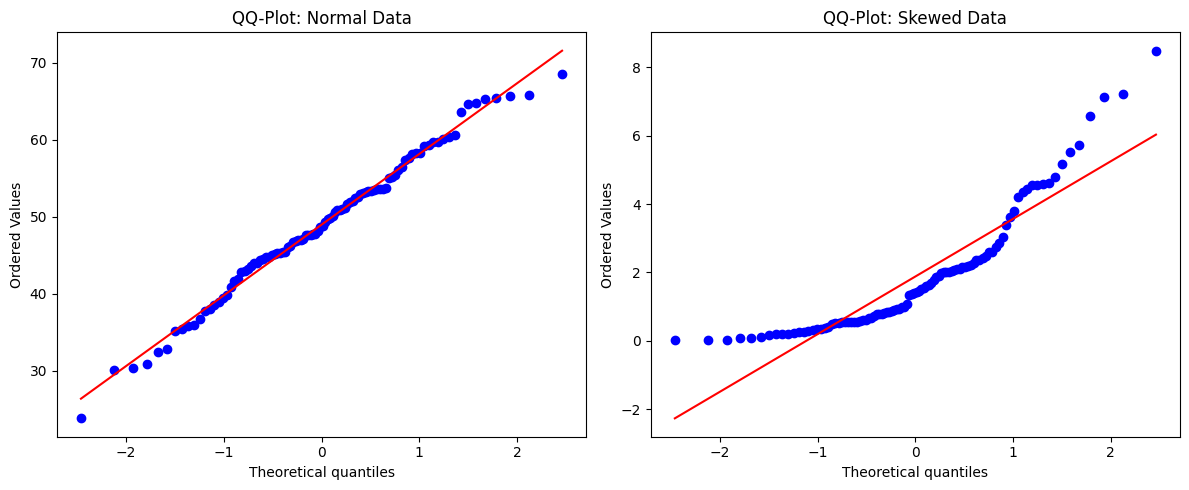

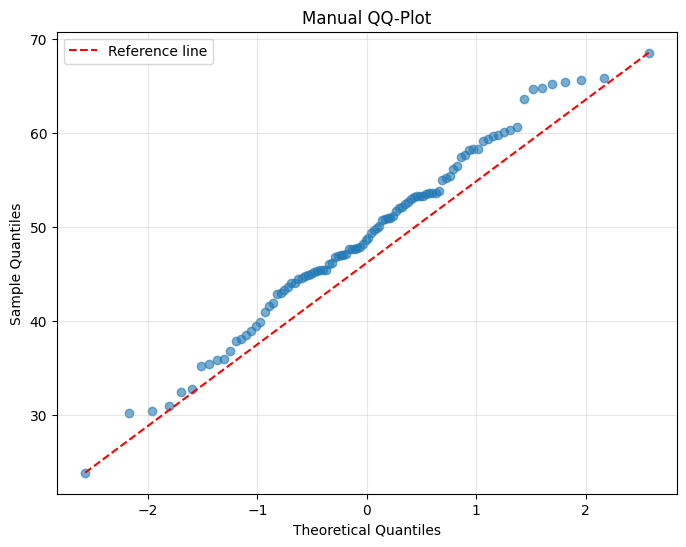

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Generate some example data
np.random.seed(42)
normal_data = np.random.normal(loc=50, scale=10, size=100)
skewed_data = np.random.exponential(scale=2, size=100)

# Method 1: Using scipy's probplot (easiest)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# QQ-plot for normal data
stats.probplot(normal_data, dist="norm", plot=axes[0])
axes[0].set_title("QQ-Plot: Normal Data")

# QQ-plot for skewed data
stats.probplot(skewed_data, dist="norm", plot=axes[1])
axes[1].set_title("QQ-Plot: Skewed Data")

plt.tight_layout()
plt.show()

# Method 2: Manual calculation (to understand what's happening)
def manual_qqplot(data):
    # Sort the data
    sorted_data = np.sort(data)
    n = len(sorted_data)
    
    # Calculate theoretical quantiles from standard normal distribution
    # Using (i - 0.5) / n formula for quantile positions
    quantile_positions = (np.arange(1, n + 1) - 0.5) / n
    theoretical_quantiles = stats.norm.ppf(quantile_positions)
    
    # Plot
    plt.figure(figsize=(8, 6))
    plt.scatter(theoretical_quantiles, sorted_data, alpha=0.6)
    
    # Add reference line
    min_val = theoretical_quantiles.min()
    max_val = theoretical_quantiles.max()
    plt.plot([min_val, max_val], 
             [sorted_data.min(), sorted_data.max()], 
             'r--', label='Reference line')
    
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Sample Quantiles')
    plt.title('Manual QQ-Plot')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

manual_qqplot(normal_data)

## z-value, z-Score

> A z-score tells you how many standard deviations a data point is from the mean of a normal distribution.
> It quantifies how far a data point is from the mean (average) of a dataset, in terms of standard deviations. 

The z-value (test statistic) is a summary number computed from *all* your observations. It measures how far your observed difference (uplift) is from 0 (the null hypothesis), in units of standard errors.

Once you have your z-value, you ask:
* “If H₀ were true (uplift = 0), how often would a z-value this extreme appear just by chance?”
* That tail probability = the p-value.
* If it’s less than α (e.g., 0.05), then the observed difference is unlikely to be just random noise → statistically significant.

## p-value
The hypothesis test is (in most cases) based on a the **p-value, which gives a limit on the probability that the difference is likely not due to chance**. If this value is below a threshold (often 5%), then the hypothesis test concludes that the difference is likely not due to chance.

> The **p-value is the probability**, under the assumption that the null hypothesis (H₀) is true, of observing a test statistic (like your z-value) at least as extreme as the one you actually got.

* Suppose under H₀ (no uplift), the null distribution of z-scores is the standard normal (mean = 0, σ = 1).
* You observe z = 2.44.
* The p-value = **area** under the null curve **to the right of 2.44**.
* That area ≈ 0.007 → meaning: If there was truly no difference, only 0.7% of experiments would show a result this extreme just by chance.

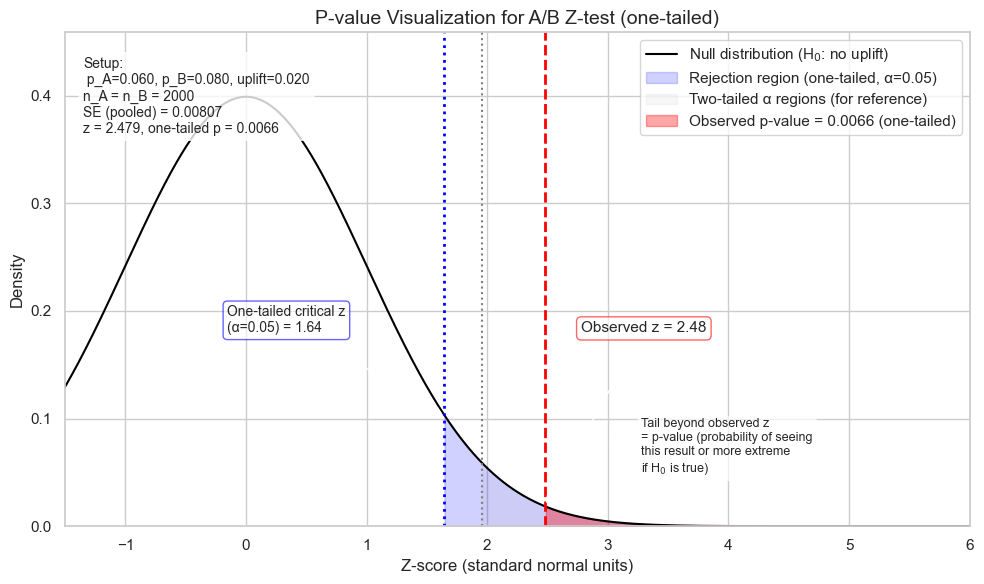

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns

plt.rcParams["font.family"] = "DejaVu Sans"
sns.set(style="whitegrid")

# Example: z-statistic from AB test (pooled test)
uplift = 0.02
p_A, p_B = 0.06, 0.08
n_A = n_B = 2000

# Pooled SE for hypothesis test (one-tailed)
p_pool = (p_A*n_A + p_B*n_B) / (n_A+n_B)
SE_pooled = np.sqrt(p_pool*(1-p_pool)*(1/n_A+1/n_B))

z_stat = uplift / SE_pooled
p_value = 1 - norm.cdf(z_stat)  # one-tailed test B > A

# Critical values
alpha = 0.05
z_alpha_one = norm.ppf(1 - alpha)      # one-tailed critical
z_alpha_two = norm.ppf(1 - alpha/2)    # two-tailed critical (for reference)

# x range centered more on relevant area
x = np.linspace(-4, 6, 1000)
y = norm.pdf(x, 0, 1)

fig, ax = plt.subplots(figsize=(10,6))

# Null distribution curve
ax.plot(x, y, color="black", lw=1.5, label="Null distribution (H$_0$: no uplift)")

# Shade rejection region (one-tailed, alpha)
ax.fill_between(x, 0, y, where=(x >= z_alpha_one), color='blue', alpha=0.18, label=f"Rejection region (one-tailed, α={alpha})")
# Shade two-tailed critical regions lightly for context
ax.fill_between(x, 0, y, where=(x <= -z_alpha_two) | (x >= z_alpha_two), color='gray', alpha=0.06, label="Two-tailed α regions (for reference)")

# Shade p-value area (tail beyond observed z)
ax.fill_between(x, 0, y, where=(x >= z_stat), color='red', alpha=0.35, label=f"Observed p-value = {p_value:.4f} (one-tailed)")

# Vertical lines for statistics
ax.axvline(z_stat, color='red', linestyle='--', lw=2)
ax.axvline(z_alpha_one, color='blue', linestyle=':', lw=2)
ax.axvline(z_alpha_two, color='gray', linestyle=':', lw=1.5)

# Annotate values with arrows and text boxes
ax.annotate(f"Observed z = {z_stat:.2f}", xy=(z_stat, norm.pdf(z_stat)), xytext=(z_stat+0.3, 0.18),
            arrowprops=dict(facecolor='red', arrowstyle='->'), fontsize=11, bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="red", alpha=0.6))

ax.annotate(f"One-tailed critical z\n(α={alpha}) = {z_alpha_one:.2f}", xy=(z_alpha_one, norm.pdf(z_alpha_one)), xytext=(z_alpha_one-1.8, 0.18),
            arrowprops=dict(facecolor='blue', arrowstyle='->'), fontsize=10, bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="blue", alpha=0.6))

ax.annotate("Tail beyond observed z\n= p-value (probability of seeing\nthis result or more extreme\nif H$_0$ is true)", xy=(z_stat+0.5, 0.08), xytext=(z_stat+0.8, 0.05),
            arrowprops=dict(facecolor='red', arrowstyle='->'), fontsize=9, bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="none", alpha=0.7))

# Add textual summary box
textstr = (f"Setup:\n p_A={p_A:.3f}, p_B={p_B:.3f}, uplift={uplift:.3f}\n"
           f"n_A = n_B = {n_A}\nSE (pooled) = {SE_pooled:.5f}\n"
           f"z = {z_stat:.3f}, one-tailed p = {p_value:.4f}")
ax.text(0.02, 0.95, textstr, transform=ax.transAxes, fontsize=10,
        verticalalignment='top', bbox=dict(boxstyle="round", facecolor="white", alpha=0.8))

# Labels and styling
ax.set_title("P-value Visualization for A/B Z-test (one-tailed)", fontsize=14)
ax.set_xlabel("Z-score (standard normal units)")
ax.set_ylabel("Density")
ax.set_xlim(-1.5, 6)
ax.set_ylim(0, max(y)*1.15)
ax.legend(loc='upper right')

plt.tight_layout()
plt.show()

## Correlation Matrix
> A correlation matrix is a table **showing correlation coefficients between variables**. Each cell in the table shows the correlation between two variables. The value ranges from -1 to +1, where +1 indicates a perfect positive correlation, -1 indicates a perfect negative correlation, and 0 indicates no correlation.

Correlation Matrix:
           Height_cm  Weight_kg       Age
Height_cm   1.000000   0.995212  0.945439
Weight_kg   0.995212   1.000000  0.954711
Age         0.945439   0.954711  1.000000




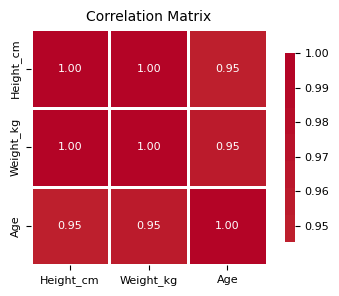

In [12]:
import numpy as np
import pandas as pd

# Sample data: heights, weights, and ages
data = {
    'Height_cm': [165, 170, 180, 175, 160, 185, 172, 168],
    'Weight_kg': [60, 70, 85, 75, 55, 90, 72, 65],
    'Age': [25, 30, 35, 28, 22, 40, 32, 26]
}

df = pd.DataFrame(data)

# Calculate correlation matrix
corr_matrix = df.corr()

print("Correlation Matrix:")
print(corr_matrix)
print("\n" + "="*40 + "\n")

# Optional: visualize with seaborn
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 3))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, fmt='.2f')
plt.title('Correlation Matrix', fontsize=10)
plt.tight_layout()
plt.show()

## Contingency Table
> A contingency table (also known as a cross-tabulation or **crosstab**) is a type of table in statistics that displays the **frequency distribution of categorical variables**. It is used to analyze the relationship between two or more categorical variables by showing the counts or frequencies of observations that fall into each combination of categories

Contingency Table:
Preference  A  B  All
Gender               
Female      4  4    8
Male        5  3    8
All         9  7   16




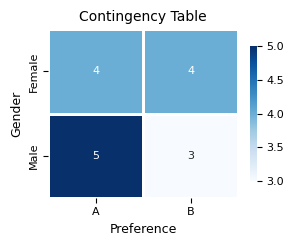

In [13]:
import pandas as pd
import numpy as np

# Sample data: gender and product preference
data = {
    'Gender': ['Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female',
               'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female'],
    'Preference': ['A', 'B', 'A', 'A', 'B', 'B', 'A', 'A', 
                   'B', 'A', 'A', 'B', 'B', 'A', 'A', 'B']
}

df = pd.DataFrame(data)

# Create contingency table
contingency_table = pd.crosstab(df['Gender'], df['Preference'], margins=True)

print("Contingency Table:")
print(contingency_table)
print("\n" + "="*40 + "\n")

# Optional: visualize with seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# Create heatmap (without margins for visualization)
ct_no_margins = pd.crosstab(df['Gender'], df['Preference'])

plt.figure(figsize=(3, 2.5))
sns.heatmap(ct_no_margins, annot=True, fmt='d', cmap='Blues', 
            cbar_kws={"shrink": 0.8}, linewidths=1)
plt.title('Contingency Table', fontsize=10)
plt.xlabel('Preference', fontsize=9)
plt.ylabel('Gender', fontsize=9)
plt.tight_layout()
plt.show()

# Bootstrappping Samples
> Bootstrapping is a statistical resampling technique.
> Intuition: You treat your existing sample as if it were the population — then you “resample from it” to see how much your statistic would vary if you repeated the study many times.

1. Take your original sample (say, 100 data points).
2. Randomly draw new samples of the same size, with replacement, from that original sample (each new “bootstrap sample” can include the same original observation multiple times — that’s what lets you mimic the randomness of repeated sampling without collecting new data).
3. Compute the statistic you care about (e.g., mean, median, regression coefficient) for each resample.
4. Look at the distribution of those resampled statistics.

## Example
* Say your sample of 100 people has a mean height of 175 cm.
* You create 1,000 bootstrap samples (each 100 values, drawn with replacement), and compute their means.
* The **spread (standard deviation) of those 1,000 means ≈ bootstrap standard error of the mean**.

## Step-b-step

1. **Population (unknown, huge, e.g. 1,000,000 people)**  
   → You don’t have access to everyone.

2. **You draw one real sample**  
   $S_1 = 100$ observations (your actual data).  
   This is all the information you have about the population.
    When you first took your sample S_1 of 100 observations, you computed its mean:
    
    $\bar{x}{S_1} = \frac{1}{100}\sum{i=1}^{100} x_i$

    That number — $\bar{x}_{S_1}$ — is your estimate of the population mean $\mu$.
    That’s your best single-point guess.


3. **Bootstrapping begins**  
   You now treat $S_1$ as if it were the **entire population**.  
   Then you:  
   - Draw a new sample $S_2$ of size 100 — **with replacement** — from $S_1$.  
     (So some observations from $S_1$ appear multiple times, others not at all.)  
   - Compute your statistic (mean, median, regression coefficient, etc.) on $S_2$.

4. **Repeat**  
   Do this thousands of times → $S_2, S_3, S_4, \dots, S_{1000}$.  

    Each resample gives you a new mean, say
    $\bar{x}_1, \bar{x}_2, \bar{x}3, \dots, \bar{x}{1000}$
	
    These means form a **bootstrap distribution**.
    If you plot them, you typically get something roughly bell-shaped (especially if $n$ is large enough).
    
    Their distribution ≈ the **sampling distribution** of your estimator. I.e. the distribution of bootstrap means mimics what the distribution of real sample means (from the population) would look like.

From that bootstrap distribution, you can compute:
* The standard deviation → bootstrap **estimate of the standard error of the mean**.

    $SE_{boot} = SD(\bar{x}_1, \bar{x}2, \dots, \bar{x}{1000})$

* The percentiles (e.g., 2.5th and 97.5th) → 95% confidence interval for the population mean.

So in summary, bootstrapping lets you estimate the variability of your statistic (like the mean) without needing to collect new data — by resampling from your existing sample.
* **Your population mean estimate** = $\bar{x}_{S_1}$ (the mean of your original sample).
* **Your bootstrap results tell you how reliable that estimate** is — how much it might vary if you’d sampled again.


